# Libraries

In [1]:
import keras
from keras.preprocessing import image as kimage
from keras.applications import mobilenet_v2
from sklearn.neighbors import KDTree
import joblib

from matplotlib import pyplot as plt
import numpy as np
from time import time
import os

Using TensorFlow backend.
/Users/kappa/opt/miniconda3/envs/dsim/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kappa/opt/miniconda3/envs/dsim/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kappa/opt/miniconda3/envs/dsim/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kapp

# Load model

In [2]:
model = mobilenet_v2.MobileNetV2(include_top=False, weights='imagenet', pooling='max', input_shape=(224, 224, 3))

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
test_img = "./2d/pictures_new/khaled/khaled_36.png"
img = kimage.load_img(test_img, target_size=(224, 224))

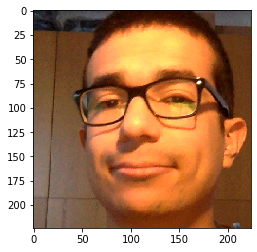

In [4]:
plt.imshow(img); plt.show()

Convert img in np array

In [5]:
x = kimage.img_to_array(img)

Preprocess img

In [6]:
x = mobilenet_v2.preprocess_input(x)

In [7]:
x = np.expand_dims(x, axis=0)

Estraggo feature

In [8]:
features = model.predict(x).flatten()
features.shape

(1280,)

In [9]:
def neural_features(img):
    x = kimage.img_to_array(img)
    x = mobilenet_v2.preprocess_input(x)
    x = np.expand_dims(x, axis=0)
    f = model.predict(x)
    return f.flatten()

In [10]:
# Data loader
pics_per_artist = 2
def load_data(feature_extractor, base_path):

    paths = []
    features = []
    artist_folders = os.listdir(base_path)
    for artist_folder in artist_folders:
        #print(artist_folder)
        artist_path = base_path + "/" + artist_folder
        if os.path.isdir(artist_path):
            for fi,f in enumerate(sorted(os.listdir(artist_path))):
                if f.endswith('.jpg') and fi < pics_per_artist:
                    # Memorizza percorso file
                    cur_path = artist_path+"/" + f
                    paths.append(cur_path)

                    # Carica file ed estraine le features
                    image = kimage.load_img(cur_path, target_size=(224, 224))
                    cur_features = feature_extractor(image)
                    features.append(cur_features)

    features = np.array(features)
    return features, paths

In [11]:
base_path = "/Users/kappa/repositories/dsim_project/MSRA-CFW/Dataset/thumbnails_features_deduped_publish/thumbnails_features_deduped_publish"

In [13]:
%%time
X_train, paths = load_data(feature_extractor=neural_features, base_path=base_path)

CPU times: user 19min 31s, sys: 3min 36s, total: 23min 8s
Wall time: 9min 26s


In [14]:
len(paths)

3160

# Albero di ricerca

In [15]:
tree = KDTree(X_train)

Trasformo l'immagine:

In [16]:
query_features = neural_features(img)
query_features.shape

(1280,)

Interrogo l'albero di ricerca

In [18]:
%%time
# Ricerca
dist, ind = tree.query(query_features.reshape(1, -1), k=10)

CPU times: user 7.72 ms, sys: 1.59 ms, total: 9.32 ms
Wall time: 7.58 ms


Which people are more similar to me?

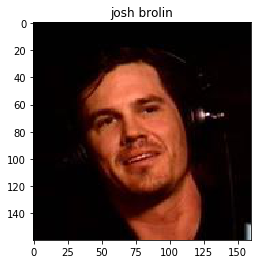

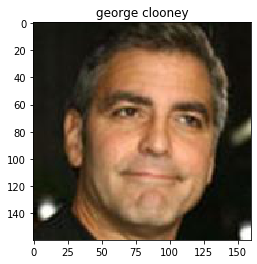

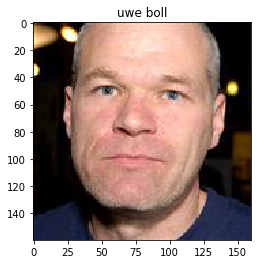

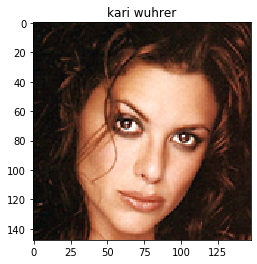

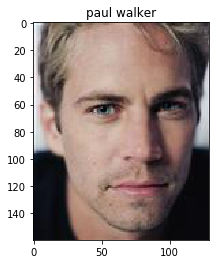

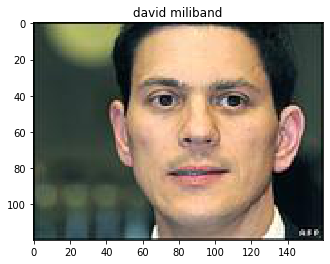

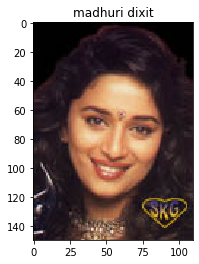

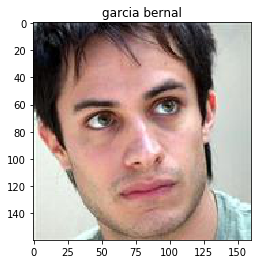

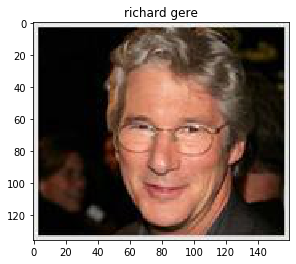

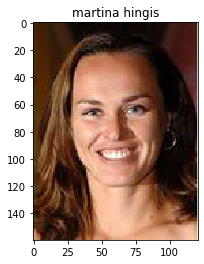

In [19]:
for i in range(10):
    path = paths[ind[0][i]]
    vip_name = path.split("/")[-2]
    img=kimage.load_img(paths[ind[0][i]])
    plt.title(vip_name)
    plt.imshow(img); plt.show()